In [ ]:
!pip install deepface
!pip install facenet-pytorch

In [ ]:
from deepface import DeepFace
import cv2
import torch
import numpy as np
from facenet_pytorch import MTCNN
import requests
from io import BytesIO
from PIL import Image
from PIL import Image, ImageDraw
from PIL import ImageFilter

In [3]:
def face_finder(img_path, confidence=0.90, gender=None, age_min=None, age_max=None, race=None):
    response = requests.get(img_path)
    img = Image.open(BytesIO(response.content))
    img_copy = img.copy()
    draw = ImageDraw.Draw(img_copy)

    mtcnn = MTCNN()
    boxes, confs = mtcnn.detect(img_copy)
    img.show()

    for i in range(len(confs)):
        box = boxes[i]
        conf = confs[i]
        if conf < confidence: continue
        x = box[0]
        y = box[1]
        x2 = box[2]
        y2 = box[3]
        width_half = (x2 - x)/2
        height_half = (y2 - y)/2
        area = (int(x-width_half), int(y-height_half),
                int(x2+width_half), int(y2+height_half) )

        # Crop, show, and save image
        cropped_img = img.crop(area)
        cropped_img.save('cropped_img.jpg')

        try:
          obj = DeepFace.analyze(img_path = 'cropped_img.jpg', actions = ['age', 'gender', 'race'])
        except:
          continue

        if gender == None:
            pass
        elif gender.lower() != obj['gender'].lower():
            continue

        if race == None:
            pass
        elif race.lower() != obj['dominant_race'].lower():
            continue

        if age_min == None:
            pass
        elif age_min > obj['age']:
            continue

        if age_max == None:
            pass
        elif age_max < obj['age']:
            continue

        #print(obj['dominant_race'])
        #print(obj['age'])
        draw.rectangle(box.tolist(), outline=(255, 0, 0), width=1)
    
    return img_copy

Action: race: 100%|██████████| 3/3 [00:01<00:00,  1.62it/s]


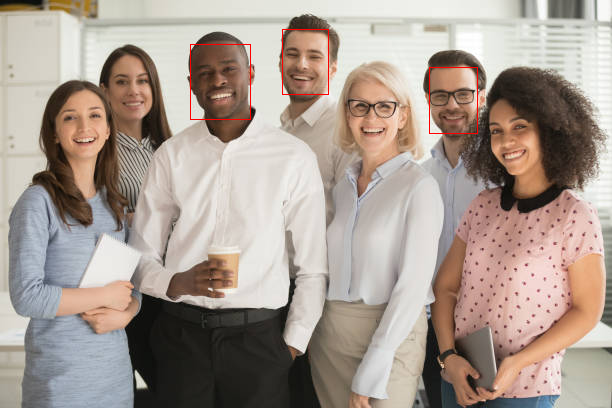

In [5]:
address = 'https://media.istockphoto.com/photos/positive-multi-racial-corporate-team-posing-looking-at-camera-picture-id1147384883?k=20&m=1147384883&s=612x612&w=0&h=t7Ls00uGUiLpAYR7k21a0x3fCGNGbKG9J3AI0lLH0Ck='

img_copy = face_finder(address, gender='man' )
img_copy

Action: race: 100%|██████████| 3/3 [00:01<00:00,  1.61it/s]


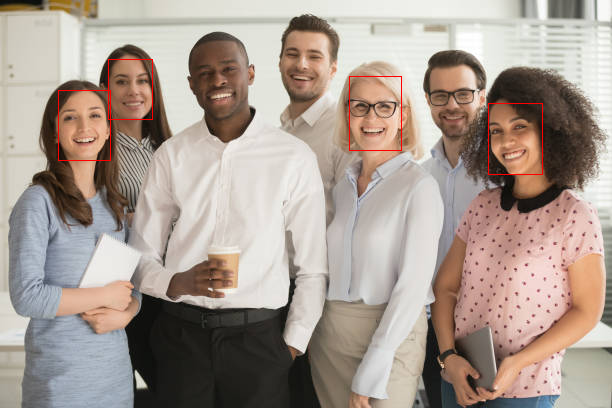

In [6]:
address = 'https://media.istockphoto.com/photos/positive-multi-racial-corporate-team-posing-looking-at-camera-picture-id1147384883?k=20&m=1147384883&s=612x612&w=0&h=t7Ls00uGUiLpAYR7k21a0x3fCGNGbKG9J3AI0lLH0Ck='

img_copy = face_finder(address, gender='woman' )
img_copy

Action: race: 100%|██████████| 3/3 [00:01<00:00,  1.57it/s]


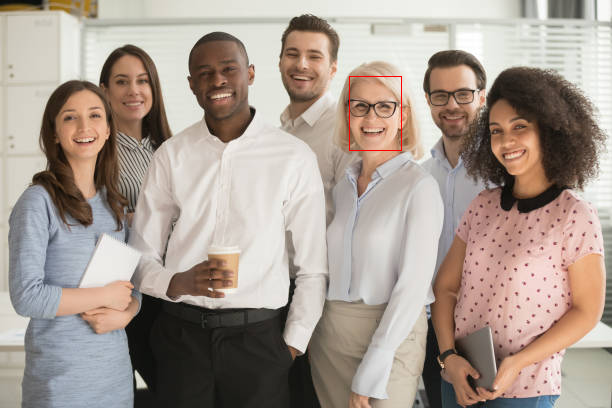

In [13]:
address = 'https://media.istockphoto.com/photos/positive-multi-racial-corporate-team-posing-looking-at-camera-picture-id1147384883?k=20&m=1147384883&s=612x612&w=0&h=t7Ls00uGUiLpAYR7k21a0x3fCGNGbKG9J3AI0lLH0Ck='

img_copy = face_finder(address, gender='woman' , age_min=35)
img_copy

Action: race: 100%|██████████| 3/3 [00:02<00:00,  1.49it/s]


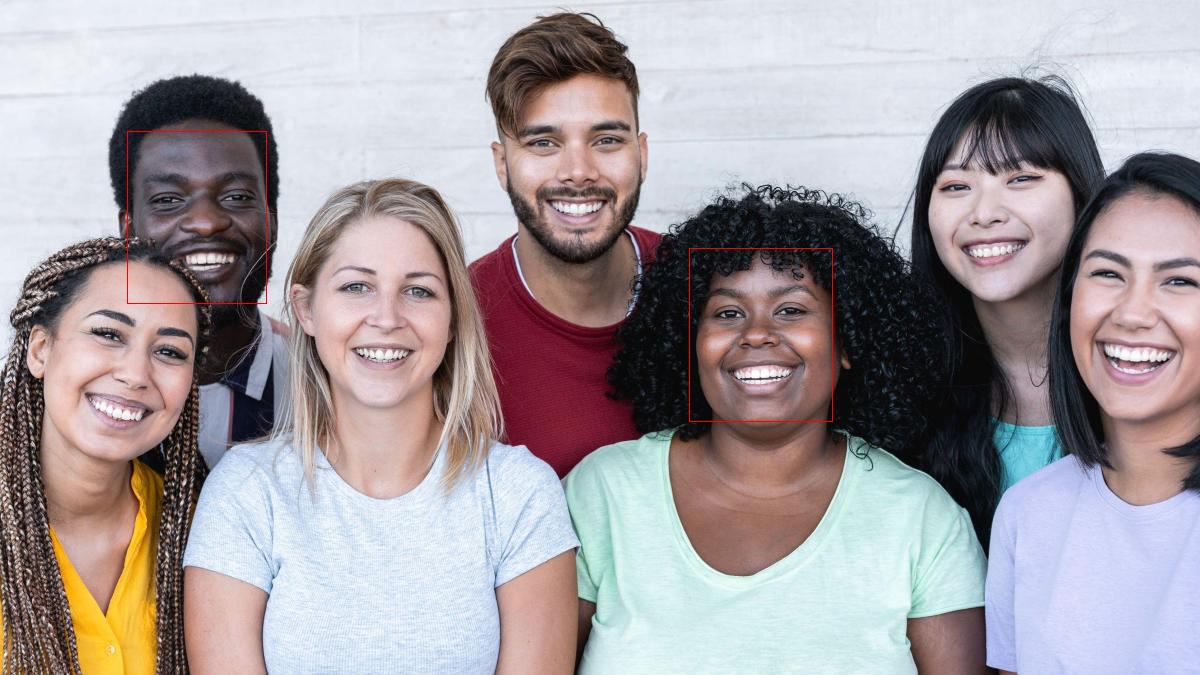

In [8]:
address = 'https://s.yimg.com/ny/api/res/1.2/2s9KZ4xwAzhuvWBwMyUuOw--/YXBwaWQ9aGlnaGxhbmRlcjt3PTEyMDA7aD02NzU-/https://s.yimg.com/uu/api/res/1.2/qaCUhh7M_aaiDC3pXqH_bQ--~B/aD0yNTU1O3c9NDU0MzthcHBpZD15dGFjaHlvbg--/https://media.zenfs.com/en/pa_viral_news_uk_120/d60fe9052078de58d80102a2ef023d20'

img_copy = face_finder(address, race='Black' )
img_copy

Action: race: 100%|██████████| 3/3 [00:02<00:00,  1.44it/s]


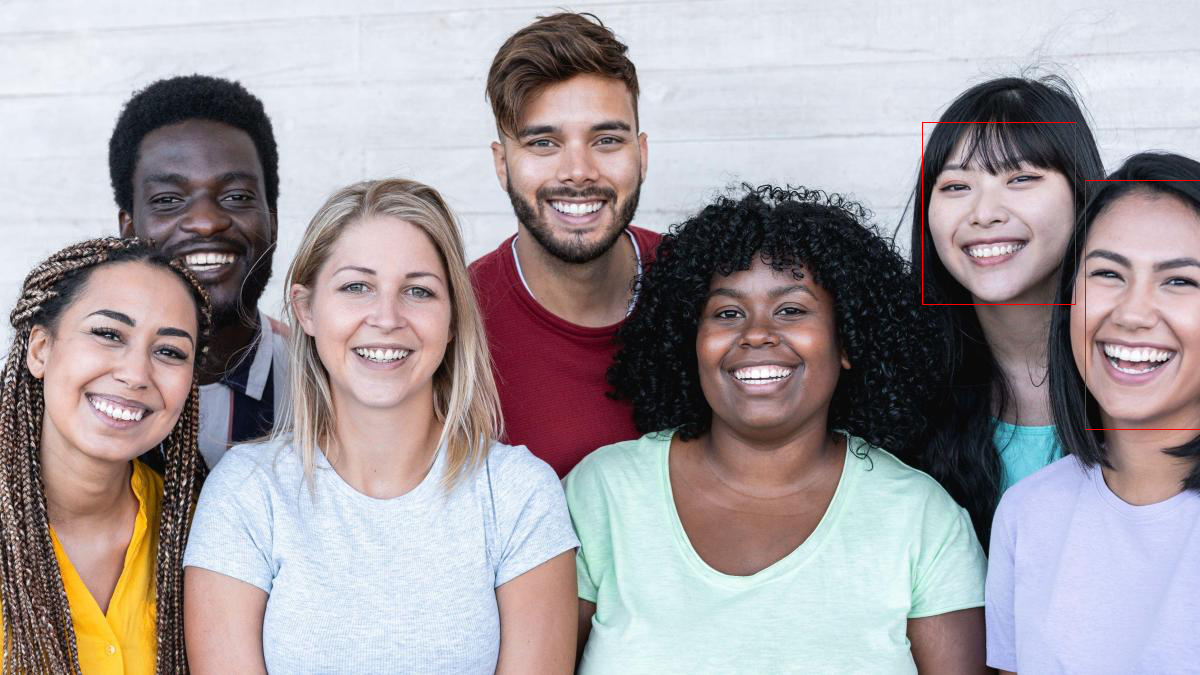

In [9]:
address = 'https://s.yimg.com/ny/api/res/1.2/2s9KZ4xwAzhuvWBwMyUuOw--/YXBwaWQ9aGlnaGxhbmRlcjt3PTEyMDA7aD02NzU-/https://s.yimg.com/uu/api/res/1.2/qaCUhh7M_aaiDC3pXqH_bQ--~B/aD0yNTU1O3c9NDU0MzthcHBpZD15dGFjaHlvbg--/https://media.zenfs.com/en/pa_viral_news_uk_120/d60fe9052078de58d80102a2ef023d20'

img_copy = face_finder(address, race='asian' )
img_copy

Action: race: 100%|██████████| 3/3 [00:01<00:00,  1.51it/s]


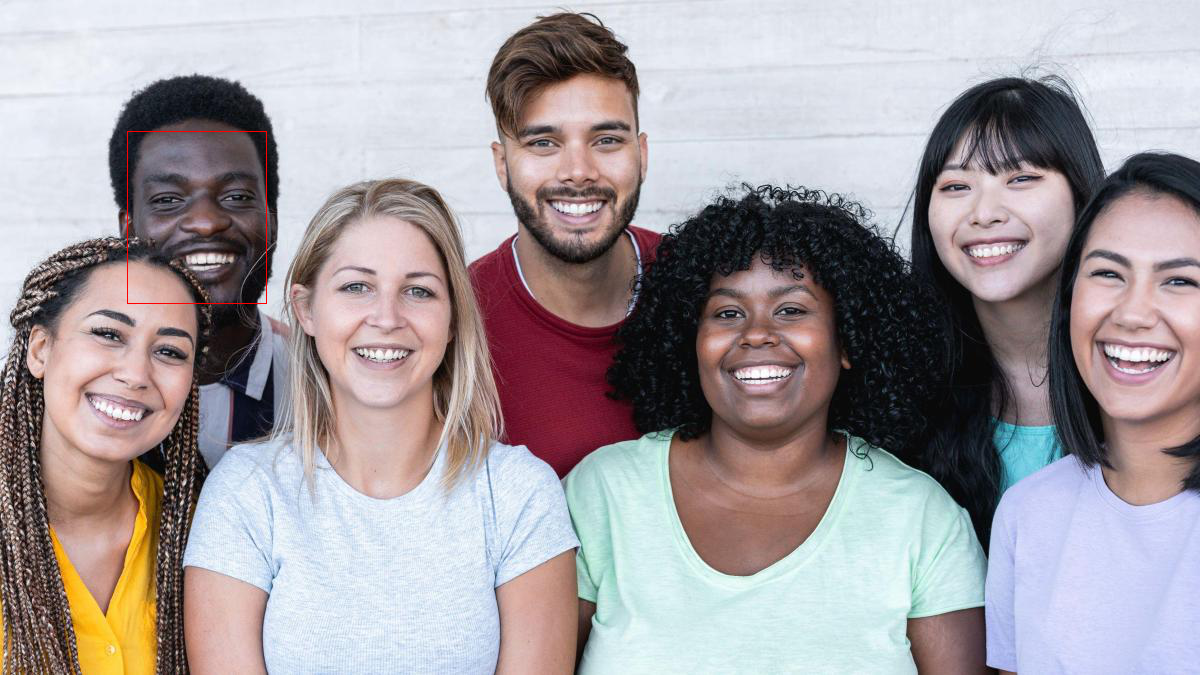

In [11]:
address = 'https://s.yimg.com/ny/api/res/1.2/2s9KZ4xwAzhuvWBwMyUuOw--/YXBwaWQ9aGlnaGxhbmRlcjt3PTEyMDA7aD02NzU-/https://s.yimg.com/uu/api/res/1.2/qaCUhh7M_aaiDC3pXqH_bQ--~B/aD0yNTU1O3c9NDU0MzthcHBpZD15dGFjaHlvbg--/https://media.zenfs.com/en/pa_viral_news_uk_120/d60fe9052078de58d80102a2ef023d20'

img_copy = face_finder(address, gender='man', race='black' )
img_copy